<a href="https://colab.research.google.com/github/subodhkanoujiya4/Data_Cleaning_-_Preprocessing./blob/main/Data_Cleaning_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First upload the dataset in csv format**

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


**seconde- import libraries, load dataset and basic info**

In [47]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


#Load Dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Basic Info
print("First 5 Rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())


First 5 Rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

**Third- handel missing values, drop unnecessary columns and categorical features**

In [48]:

#  Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

#  Drop Unnecessary Columns
df.drop(columns=['Name', 'Ticket'], inplace=True)

#  One-Hot Encode Categorical Features
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


/tmp/ipython-input-48-1779336179.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)              # Fill missing Age with median
/tmp/ipython-input-48-1779336179.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

**Fourth- standardize numerical columns**



In [49]:
# Standardize Numerical Columns
scaler = StandardScaler()
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
df[num_cols] = scaler.fit_transform(df[num_cols])

**Fifth Visualize Outliers Using Boxplots**

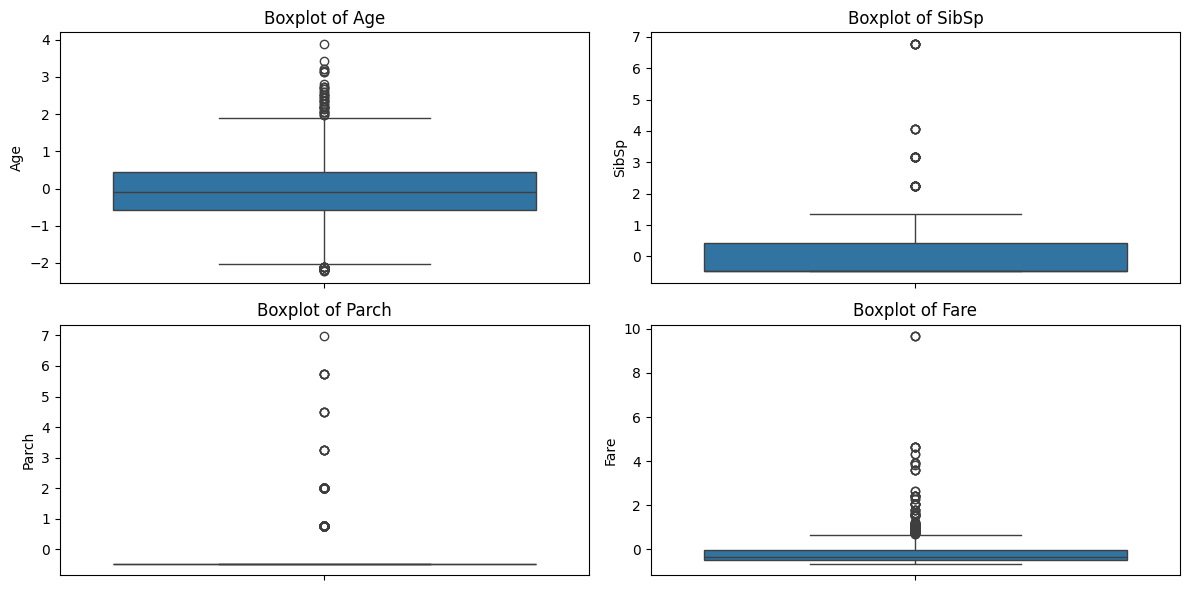

In [50]:
#  Visualize Outliers Using Boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


**Sixth- Remove Outliers Using IQR, Remove outliers from each numerical column and Final Dataset Shape and Preview**

In [51]:
#  Remove Outliers Using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers from each numerical column
for col in num_cols:
    df = remove_outliers(df, col)

# Final Dataset Shape and Preview
print("\nFinal Shape of Cleaned Data:", df.shape)
print("\nCleaned Dataset Sample:")
print(df.head())

# Optional: Save cleaned data
df.to_csv("Titanic_Cleaned.csv", index=False)


Final Shape of Cleaned Data: (561, 10)

Cleaned Dataset Sample:
   PassengerId  Survived  Pclass       Age     SibSp     Parch      Fare  \
0            1         0       3 -0.565736  0.432793 -0.473674 -0.502445   
2            3         1       3 -0.258337 -0.474545 -0.473674 -0.488854   
3            4         1       1  0.433312  0.432793 -0.473674  0.420730   
4            5         0       3  0.433312 -0.474545 -0.473674 -0.486337   
5            6         0       3 -0.104637 -0.474545 -0.473674 -0.478116   

   Sex_male  Embarked_Q  Embarked_S  
0      True       False        True  
2     False       False        True  
3     False       False        True  
4      True       False        True  
5      True        True       False  
